In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split

In [129]:
# load data
df = pd.read_csv("dataset/bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv")

In [130]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Timestap is unix time. I will convert unix time to more readable data

In [131]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit="s")

In [132]:
# now Timestamp was converted 
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4363452,2020-04-21 23:56:00,6847.97,6856.35,6847.97,6856.35,0.125174,858.128697,6855.498790
4363453,2020-04-21 23:57:00,6850.23,6856.13,6850.23,6850.89,1.224777,8396.781459,6855.763449
4363454,2020-04-21 23:58:00,6846.50,6857.45,6846.02,6857.45,7.089168,48533.089069,6846.090966
4363455,2020-04-21 23:59:00,6854.18,6854.98,6854.18,6854.98,0.012231,83.831604,6854.195090
4363456,2020-04-22 00:00:00,6850.60,6850.60,6850.60,6850.60,0.014436,98.896906,6850.600000


In [133]:
df["Weighted_Price"].isnull().sum()

1236977

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363457 entries, 0 to 4363456
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Timestamp          datetime64[ns]
 1   Open               float64       
 2   High               float64       
 3   Low                float64       
 4   Close              float64       
 5   Volume_(BTC)       float64       
 6   Volume_(Currency)  float64       
 7   Weighted_Price     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 266.3 MB


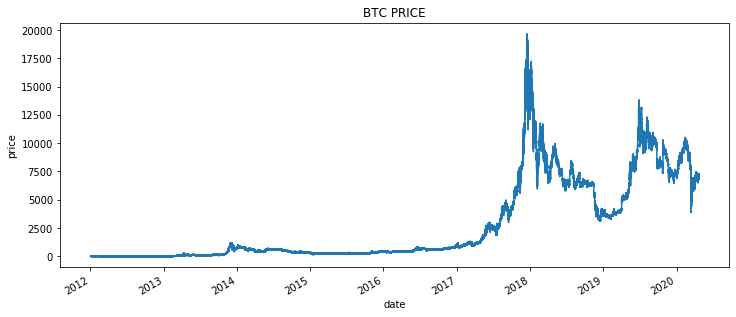

In [135]:
df.set_index("Timestamp")["Weighted_Price"].plot(figsize=(12, 5), title="BTC PRICE")
plt.xlabel("date")
plt.ylabel("price")
plt.show()

As some people know that price was increased on 2018

Let me check volume as well

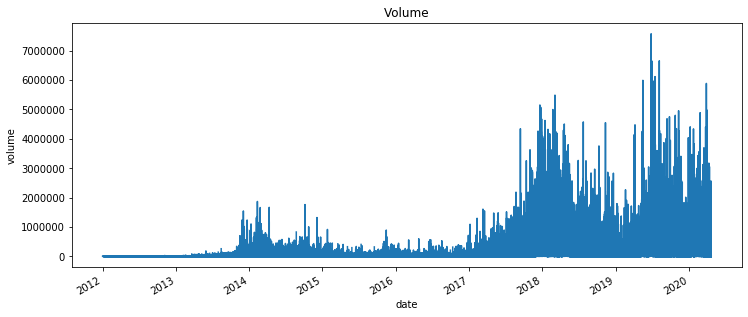

In [136]:
df.set_index("Timestamp")["Volume_(Currency)"].plot(figsize=(12, 5))
plt.title("Volume")
plt.xlabel("date")
plt.ylabel("volume")
plt.show()

As you see in the plot, Volume is increasing even now

In [137]:
# create date columns
df["year"] = df["Timestamp"].dt.year
df["month"] = df["Timestamp"].dt.month
df["day"] = df["Timestamp"].dt.day
df["day_of_week"] = df["Timestamp"].dt.dayofweek

In [138]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,year,month,day,day_of_week
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011,12,31,5
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12,31,5
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12,31,5
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12,31,5
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12,31,5


fill in all of the nulls with the last known value.

In [139]:
df = df.fillna(method="ffill")

In [140]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,year,month,day,day_of_week
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011,12,31,5
1,2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011,12,31,5
2,2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011,12,31,5
3,2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011,12,31,5
4,2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011,12,31,5


Check the price by week and month and hour

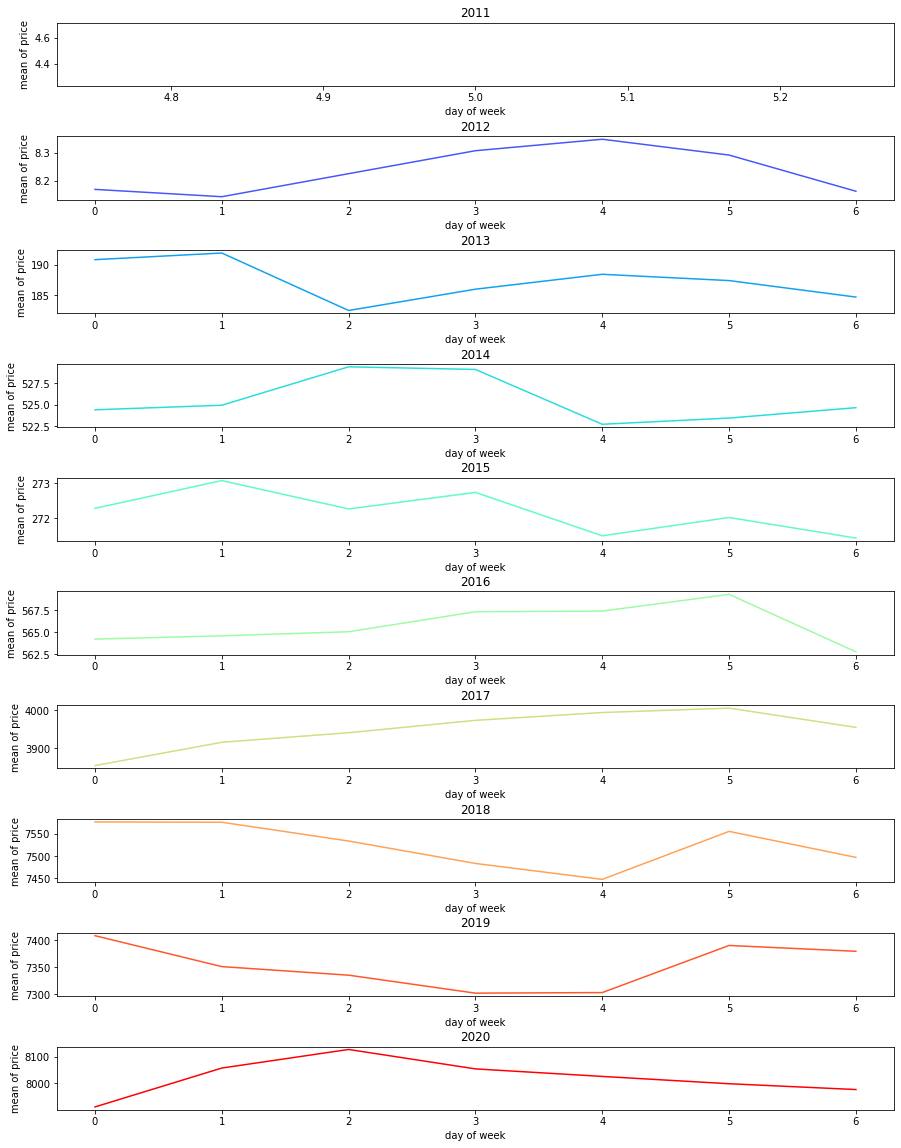

In [141]:
plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.8)

year = df["year"].unique()

color=iter(cm.rainbow(np.linspace(0,1,len(year))))

# day of week(Monday=0, Sunday=6)
for i, value in enumerate(year):
    c = next(color)
    plt.subplot(len(year), 1, i+1)
    df[df["year"] == value].groupby("day_of_week").mean()["Weighted_Price"].plot(c=c)
    plt.xlabel("day of week")
    plt.ylabel("mean of price")
    plt.title(value)

Interestingly since 2012, the trend was almost the same every 2 years

I will check price month as well

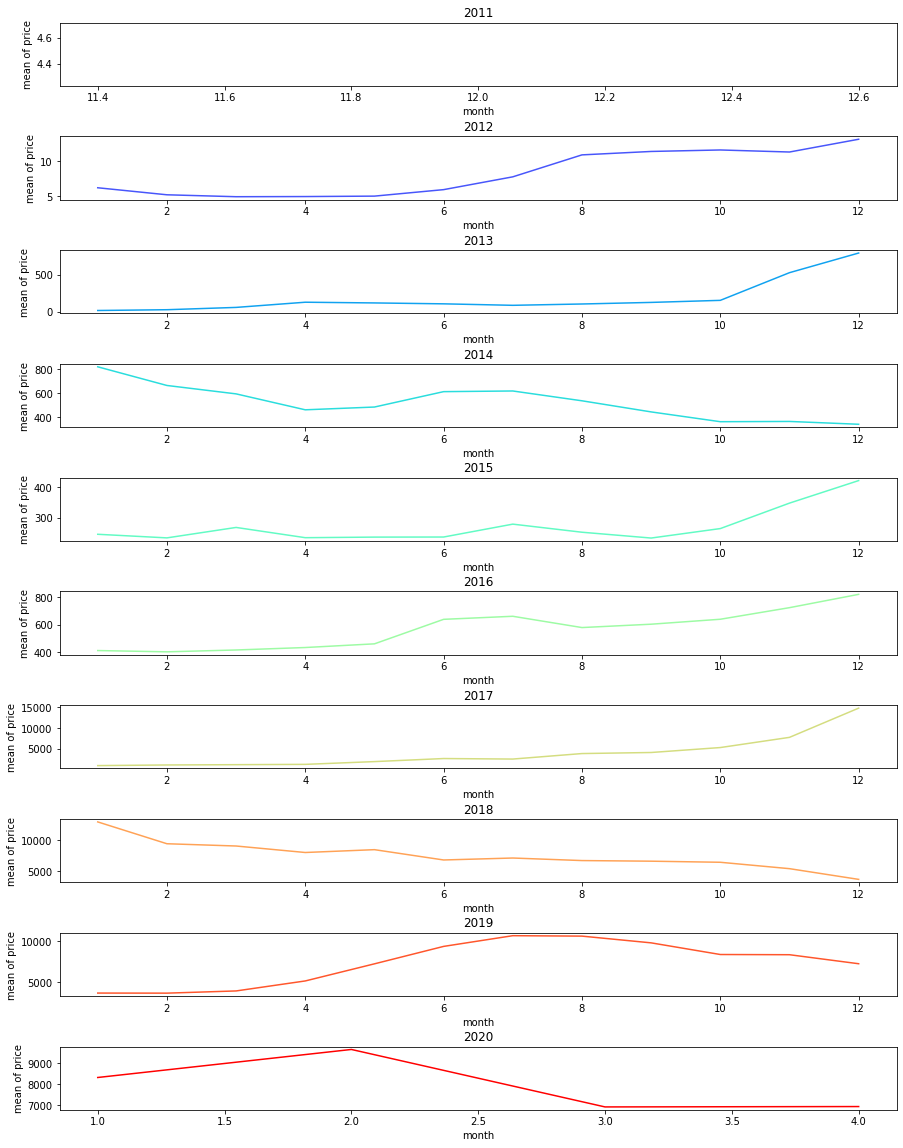

In [142]:
plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.8)


year = df["year"].unique()

color=iter(cm.rainbow(np.linspace(0,1,len(year))))

# day of week(Monday=0, Sunday=6)
for i, value in enumerate(year):
    c = next(color)
    plt.subplot(len(year), 1, i+1)
    df[df["year"] == value].groupby("month").mean()["Weighted_Price"].plot(c=c)
    plt.xlabel("month")
    plt.ylabel("mean of price")
    plt.title(value)

In [143]:
# drop data of 2011
df = df.drop(df[df.year == 2011].index)

In [150]:
# create dataset
prediction_days = 7 # predict price every 7days

df["Prediction"] = df[["Weighted_Price"]].shift(-prediction_days)
df[["Weighted_Price", "prediction"]].sample(7)

,Weighted_Price,prediction
1876201,288.200000,287.472279
1947459,233.930000,233.930000
2154681,371.470000,371.019815
593454,27.132542,27.180000
1964756,237.527356,237.495879
1568910,323.770000,323.700000
2130004,382.943146,383.732520


In [188]:
X = df.drop(["Open", "High", "Low", "Close", "Timestamp", "Prediction"], axis=1)
# remove last 7 days rows
X = X[:len(df)-prediction_days]

y = df["Prediction"]
y = y[:-prediction_days]

In [205]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2)

In [209]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [203]:
# Define parameter
units = 128
batch_size = 32
epoch = 10
dropout_rate = 0.2
optimizer = "adam"
loss_function = 'mean_squared_error'

In [215]:
# create model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

model = Sequential()

model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(dropout_rate))

model.add(LSTM(units=units, return_sequences=True))
model.add(Dropout(dropout_rate))

model.add(LSTM(units=units, return_sequences=True))
model.add(Dropout(dropout_rate))

model.add(LSTM(units=units, return_sequences=True))
model.add(Dropout(dropout_rate))

model.add(LSTM(units=units))
model.add(Dropout(dropout_rate))

model.add(Dense(units=1))

model.compile(optimizer=optimizer, loss=loss_function)

model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, validation_split=0.2)

Train on 2791988 samples, validate on 697997 samples
Epoch 1/10
     32/2791988 [..............................] - ETA: 210:38:40

KeyboardInterrupt: 